# Active shape models

This (optional) notebook combines theory with exercises to support the understanding of active shape models for object detection in medical image segmentation. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation. Use available markdown sections to fill in your answers.

**Contents:** <br>

1. [Active shape models](#active_sm)<br>

   - [Using ASMs for segmentation tasks](#active_sm_usage)

**References:**<br>

[1] Active shape models: [Cootes et al. Active Shape Models - Their Training and Application, Computer Vision and Image Understanding (1994)](http://dns2.asia.edu.tw/~ysho/YSHO-English/2000%20Engineering/PDF/Com%20Vis%20Ima%20Und61,%2038.pdf)

[2] Chapter 11.5 of the [Guide to Medical Image Analysis by Tonnies, Klaus D](https://www.springer.com/gp/book/9781447160960)


In [2]:
%load_ext autoreload
%autoreload 2

<div id="active_sm"></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Active shape models

In object detection, model-based vision allows for the recognition and location of known objects or patterns despite the presence of occlusive phenomena (e.g. noise). But what if the appearance of the object varies? This is where rigid models become inefficient. Active shape models (ASMs) are statistical models of the shape of objects which iteratively deform to fit to an example of the object in a new image. Iterative deformation is achieved by active **segmentation** preceded by registration of a model to the new image. For a detailed explanation of ASM priciples, **please read carefully the following article**: [Cootes et al. Active Shape Models - Their Training and Application, Computer Vision and Image Understanding (1994)](http://dns2.asia.edu.tw/~ysho/YSHO-English/2000%20Engineering/PDF/Com%20Vis%20Ima%20Und61,%2038.pdf)

In principle, an ASM aims to find shapes and acceptable variations of an object in a new image based on the model created from a sufficiently large training dataset. Variations in an active shape from a training phase are used to predict variation of unknown objects.

An ASM describes a $K$-dimensional shape that has $L$ boundary points in a *shape feature vector* $\mathbf{s} = (s_{0}, s_{1}, ..., s_{N}) = (x_{1,1} x_{1,2} ... x_{1,L}, x_{2,1} x_{2,2} ... x_{2,L}, ..., x_{K,1}, ... x_{K,L})$, where $x_{k,l}$ denotes the *k*th component of the *l*th boundary point $\mathbf{x}_{i}$.

With increasing $K$ dimension of the shape feature vector, more samples in the feature space are needed to compute a reliable estimate.  

An ASM is defined by its probability density function (PDF) that reflects deformation within an object class. Computation of a probabilistic shape model from training samples is typically performed as follows:

1. Identify several points on the object boundary to select landmarks (Note: semantic equivalence of selected landmarks across all training data needs to be assured)

    - primary landmarks are anatomical landmarks equivalent to anatomical locations (e.g. the brain's Sylvian fissure)
    - secondary landmarks are other image features, e.g. ridge intersections on the brain surface
    - tertiary landmarks are used to represent curvature of the shape boundary
    
2. Align landmarks within a common coordinate system 
3. Decorrelate the estimated covariance matrix to obtain uncorrelated features with eigenvectors of that covariance matrix
4. Clean up the feature space by only keeping significant variations that lie below some percentage of the total variance in the training data.

As you may correctly anticipate, there are several bottlenecks present in the process of estimating the probabilistic shape model. Semantic equivalence is often difficult, let alone impossible to determine. Moreover, human interaction is required for landmark detection, which is rarely feasible in medical practice. Hence, landmark detection is conducted based on local attributes (e.g. curvatures), geometric shape features or registration of atlases. Moreover, landmark alignment based on invalid assumptions about the object's coordinate system may cause wrong shape variation. Last but not least, the limited amount of training samples typically present in practice leads to a decrease in the significance of the estimated probability distribution.

Further information about active shape models as well as active appearance models can be found in [chapter 11.5 of the Guide to Medical Image Analysis by Tonnies, Klaus D](https://www.springer.com/gp/book/9781447160960).

<div id="active_sm_usage"></div>

### Using ASMs for segmentation tasks

As mentioned above, most of the issues related to estimating the probability density function of an ASM represent classification problems. Hence, the ASM approach is suitable for segmentation tasks. The main idea is to apply an ASM such that its shape is aligned and deformed to fit a potential shape instance in an image. ASM-assisted segmentation is done in the following steps:

1. Register an active shape model with new image data that contain a shape which is not accounted for in the shape model in terms of position, orientation and scale

<center width="100%"><img src="../reader/assets/asm_registration.png" width="600"></center>

<font size="1">Figure from [Toennies K.D. Guide to Medical Image Analysis](https://www.springer.com/gp/book/9781447160960/)</font>

<br>

2. Apply local deformations of the shape model to fit the object in the target image, thereby creating a new estimate for computing the next pose estimate (positions of the model shape with deformations)

<center width="100%"><img src="../reader/assets/asm_deformation.png" width="300"></center>

<font size="1">Figure from [Toennies K.D. Guide to Medical Image Analysis](https://www.springer.com/gp/book/9781447160960/)</font>

<br>

3. Compute as many pose estimates as are required for convergence. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.1:*
Load `coordinates.txt` which contains coordinates of 40 hand shapes, each represented by 56 points. Dimensions 1 to 56 store the $x$-coordinate and dimensions 57 to 112 store the $y$-coordinate. Plot a few shapes to examine the variation. What do you think the mean shape will look like? Compute it to verify your guess. Implement this in the `plot_hand_shapes()` function of the `active_shape_models.py` module. 

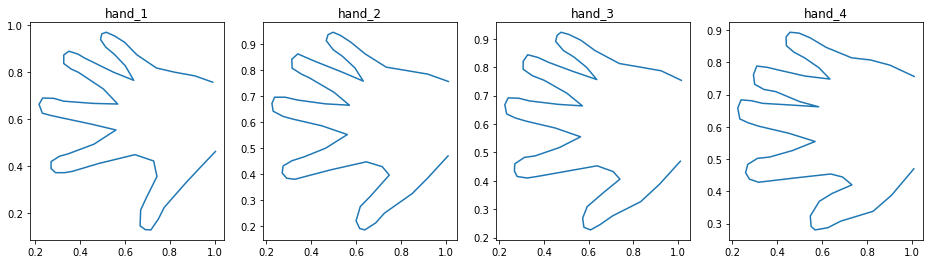

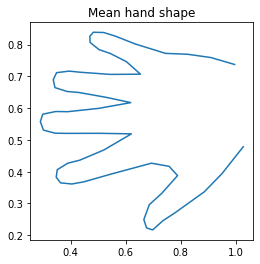

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from active_shape_models import plot_hand_shapes
plot_hand_shapes()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.2:*
Apply `mypca` on the coordinates data. How many dimensions are needed to describe 98% of the variance? Store only the vectors corresponding to these dimensions in `v`. Implement your code in the `test_mypca_hands()` function of the `active_shape_models.py` module.

In [3]:
%matplotlib inline
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append("../code")
from active_shape_models import test_mypca_hands
num_dims, v_new = test_mypca_hands()
print('Number of dimensions explaining 98% variance: {}'.format(num_dims))
print('Eigenvectors for these dimensions (shape): {}'.format(v_new.shape))

Number of dimensions explaining 98% variance: 6
Eigenvectors for these dimensions (shape): (112, 6)


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.3:*
Create a loop in the `test_remaining_variance()` function of the `active_shape_models.py` module to go through the dimensions left in `v` and compute a variation that this dimension produces. For the weight, you might want to use the corresponding eigenvalue multiplied by a small scaling factor, like $5$. What is the main variation that you notice? 

Note: If you see the warning **ComplexWarning: Casting complex values to real discards the imaginary part**, just ignore it.

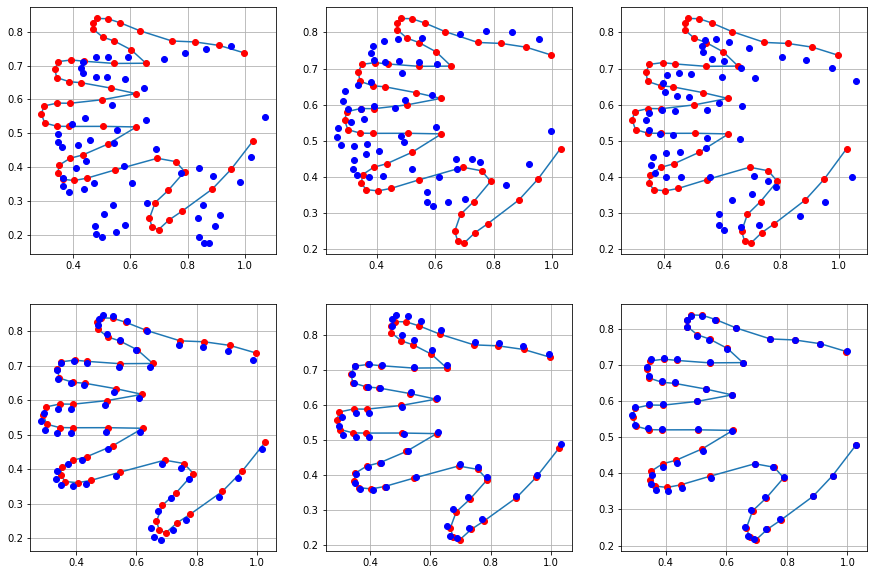

In [4]:
%matplotlib inline
import sys
sys.path.append("../code")
from active_shape_models import test_remaining_variance
test_remaining_variance()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.4:*
Load the image `test001.jpg` and view it in grayscale. If you were to plot the hand template on top of this image, what do you expect to happen? Verify your hypothesis. Implement your code in the `plot_hand_grayscale()` function of the `active_shape_models.py` module. 

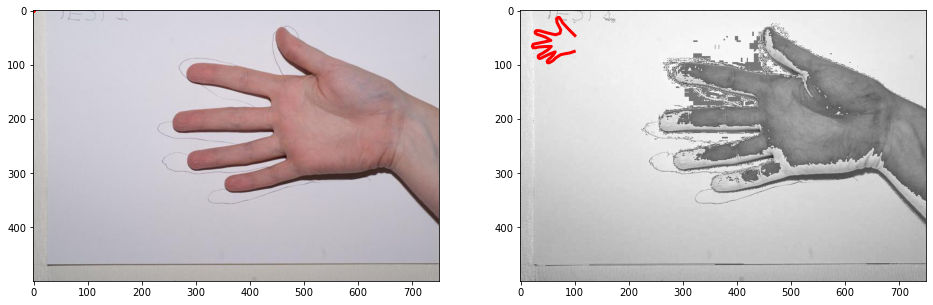

In [5]:
%matplotlib inline
import sys
sys.path.append("../code")
from active_shape_models import plot_hand_grayscale
plot_hand_grayscale()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.5:*
Transform your mean hand shape into a 2x56 dataset with `initialpos = [[meanhand[0,:56]], [meanhand[0,56:112]]]`. Think about the registration exercises you did before. Define a transformation matrix (you can try out yourself what numbers are needed) and use it to plot the hand template close to the hand in the image. Implement your code in the `test_transformed_hand()` function of the `active_shape_models.py` module.

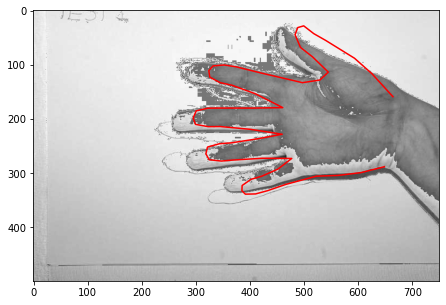

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from active_shape_models import test_transformed_hand
test_transformed_hand()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 1.1:*
Consider the active shape model for segmentation of the ventricles in the sample brain images. Describe which steps you would need to do for the data that is available to us, to train a shape model of the ventricles.

<font style="color:red">Type your answer here</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 1.6:*
You can inspect the mask of the ventricles in the sample brain images using the code below.

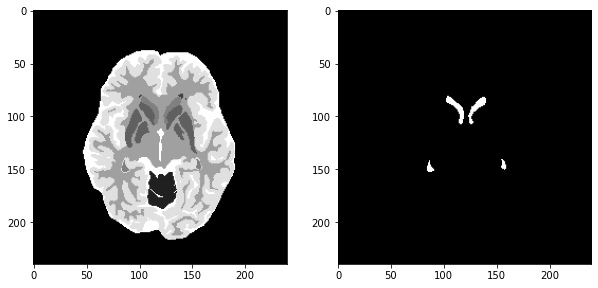

In [7]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
sys.path.append("../code")
GT = plt.imread('../data/dataset_brains/1_1_gt.tif')
gtMask = GT == 4
fig = plt.figure(figsize=(10,10))
ax1  = fig.add_subplot(121)
ax1.imshow(GT)
ax2  = fig.add_subplot(122)
ax2.imshow(gtMask)

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 1.2:*
Look at the ventricle masks for different subjects and different slices. Based on the shapes that you see, what difficulties do you think you might face, if you wanted to train an active shape model? How could you modify the dataset to overcome these difficulties?

<font style="color:red">Type your answer here</font>